<a href="https://colab.research.google.com/github/Pageblan/Decision-Trees/blob/main/Fcc_bikes_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Seoul Bike Sharing Demand. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5F62R.

@misc{misc_seoul_bike_sharing_demand_560,
  title        = {{Seoul Bike Sharing Demand}},
  year         = {2020},
  howpublished = {UCI Machine Learning Repository},
  note         = {{DOI}: https://doi.org/10.24432/C5F62R}


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


dataset_col = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation","rain", "snow", "functional"]
df = pd.read_csv("/content/drive/MyDrive/SeoulBikeData.csv").drop(["Date", "Holiday", "Seasons"], axis=1)
df.columns = dataset_col

# Convert categorical variables to numerical variables
df["functional"] = (df["functional"] == "Yes").astype(int)

# Checking for missing values
print(df.isnull().sum())

# Filling missing values
df = df.fillna(df.mean())

# Splitting data into features and target
X = df.drop('bike_count', axis=1)
y = df['bike_count']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


bike_count     0
hour           0
temp           0
humidity       0
wind           0
visibility     0
dew_pt_temp    0
radiation      0
rain           0
snow           0
functional     0
dtype: int64
Mean Squared Error: 204579.08463376013


In [ ]:
dataset_col = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation","rain", "snow", "functional"]
df = pd.read_csv("/content/drive/MyDrive/SeoulBikeData.csv").drop(["Date", "Holiday", "Seasons"], axis=1)
df.columns = dataset_col
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bike_count   8760 non-null   int64  
 1   hour         8760 non-null   int64  
 2   temp         8760 non-null   float64
 3   humidity     8760 non-null   int64  
 4   wind         8760 non-null   float64
 5   visibility   8760 non-null   int64  
 6   dew_pt_temp  8760 non-null   float64
 7   radiation    8760 non-null   float64
 8   rain         8760 non-null   float64
 9   snow         8760 non-null   float64
 10  functional   8760 non-null   object 
dtypes: float64(6), int64(4), object(1)
memory usage: 752.9+ KB


In [ ]:
df["functional"] = (df["functional"] == "Yes").astype(int)
df= df[df["hour"] == 12]# only bring results where hour = 12
df = df.drop(["hour"], axis=1)# drops the hour column
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


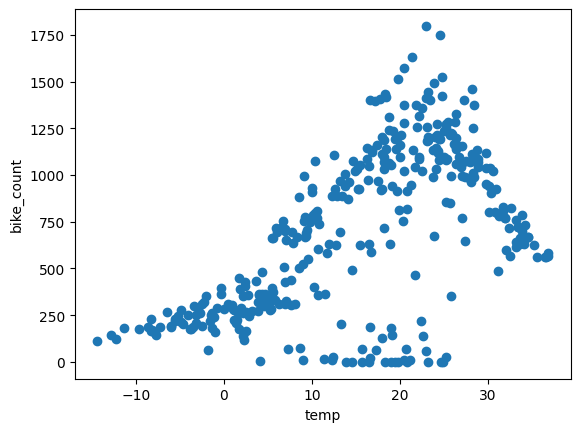

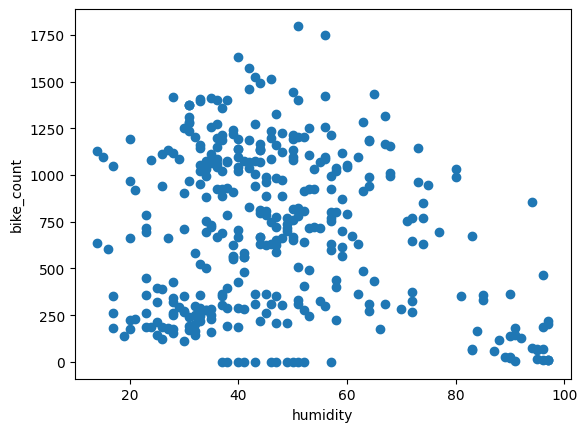

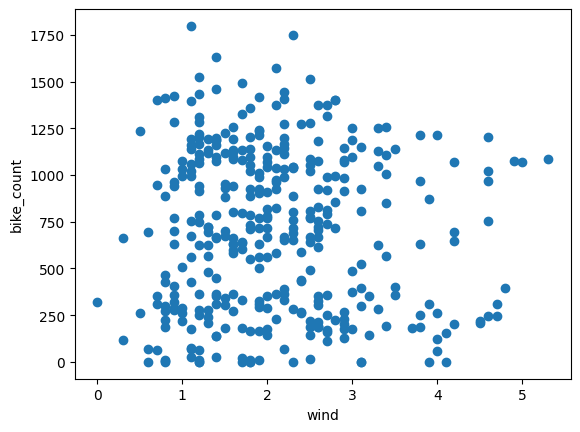

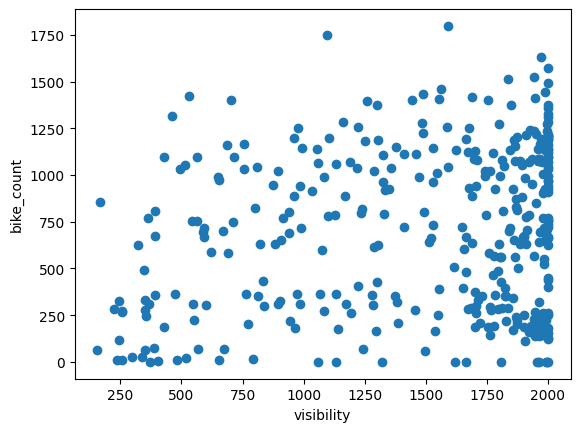

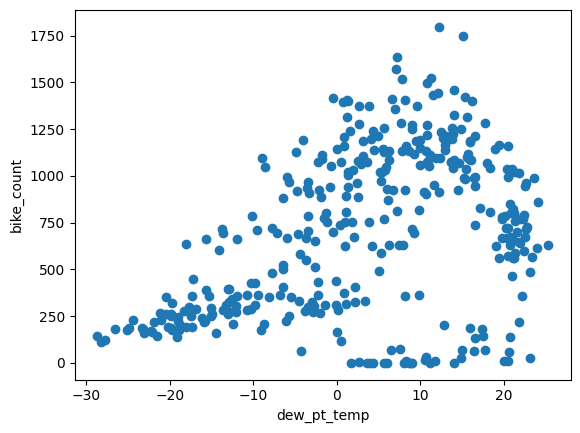

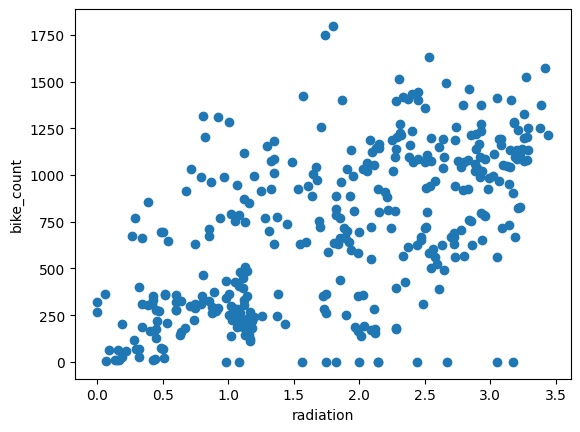

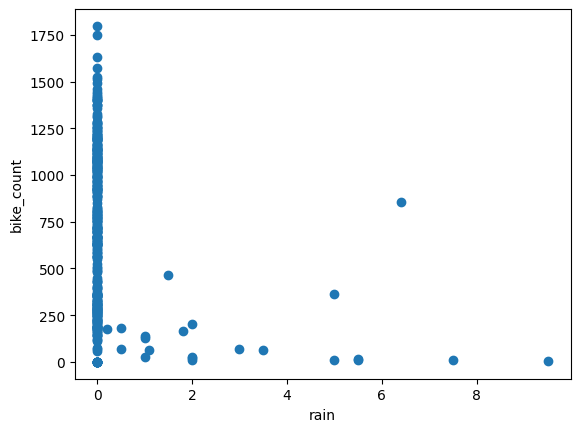

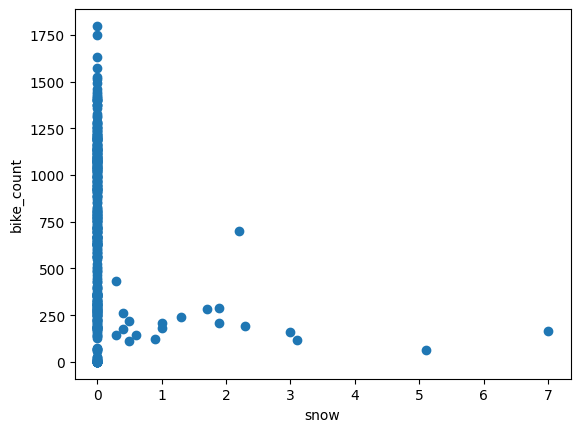

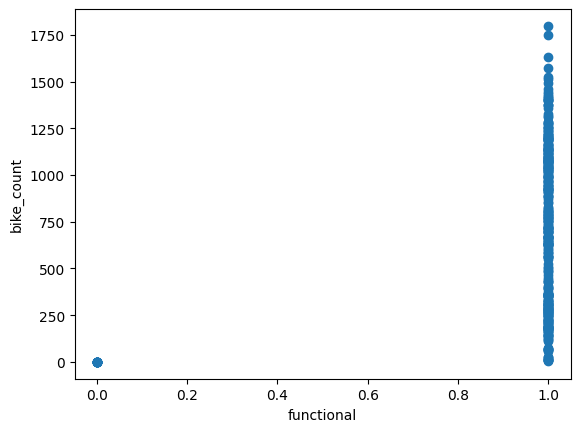

In [ ]:
for label in df.columns[1:]: #for every column after the fast
    plt.scatter(df[label], df["bike_count"])
    plt.xlabel(label)
    plt.ylabel("bike_count")
    plt.show()

In [ ]:
df = df.drop(["wind", "visibility", "functional"], axis=1)
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


Train, Validation, Test

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if  x_labels is None:# if x labels is null
    X = dataframe[[c for c in dataframe.columns if c != y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)#reshape to make it 2d
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))# Combines the features (X) and the target (y) into a single NumPy array by horizontally stacking them using np.hstack.

  return data, X, y

In [ ]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, X_valid_temp, y_valid_temp = get_xy(valid, "bike_count", x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

In [ ]:
temp_reg = LinearRegression().fit(X_train_temp, y_train_temp)

In [ ]:
print(temp_reg.coef_, temp_reg.intercept_)

[[18.73772983]] [403.39152392]


In [ ]:
temp_reg.score(X_test_temp, y_test_temp)

0.43117948692322605

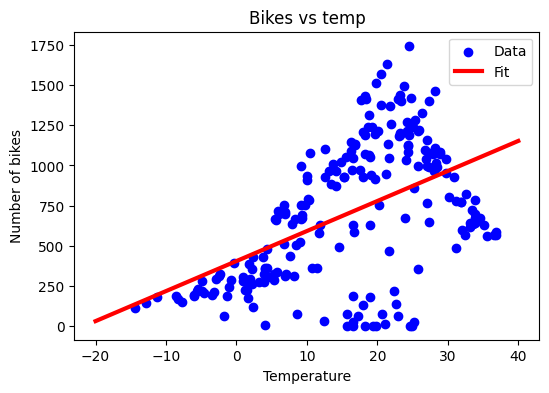

In [ ]:
plt.figure(figsize=(6, 4))
# Scatter plot of the training data
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")

# Generate 100 linearly spaced values between -20 and 40
x = tf.linspace(-20, 40, 100)

# Plot the linear regression model's predictions
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)

# Add legend to the plot
plt.legend()

# Add title and labels
plt.title("Bikes vs temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temperature")

# Show the plot
plt.show()

Mutiple linear regression

In [ ]:
df.columns

Index(['bike_count', 'temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'],
      dtype='object')

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, x_train, y_train = get_xy(train, "bike_count", x_labels= df.columns[1:])
_, x_valid, y_valid = get_xy(valid, "bike_count", x_labels= df.columns[1:])
_, x_test, y_test = get_xy(test, "bike_count", x_labels= df.columns[1:])

In [ ]:
all_reg = LinearRegression().fit(x_train, y_train)

In [ ]:
y_pred_lr = all_reg.predict(x_test)

In [ ]:
all_reg.score(x_test, y_test)

0.3562767123130004

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [ ]:
#normalize the data
#input_shape=[1] shapes the data to one vector

# Initialize a normalization layer with the input shape specified
# Normalize the training data
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)

# Adapt the normalization layer to the training data
temp_normalizer.adapt(X_train_temp.reshape(-1))


In [ ]:
# Define the neural network model
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

# Compile the model
temp_nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error'
)

# Train the model
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    epochs=1000,
    verbose=0,
    validation_data=(X_valid_temp, y_valid_temp)
)

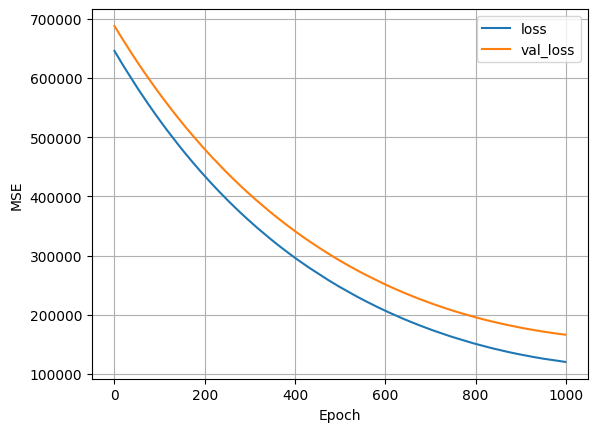

In [ ]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


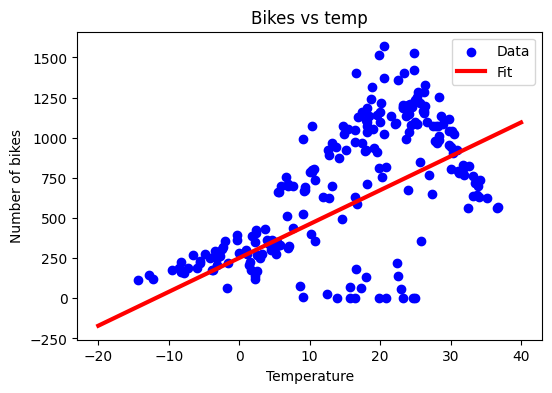

In [ ]:
plt.figure(figsize=(6, 4))
# Scatter plot of the training data
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")

# Generate 100 linearly spaced values between -20 and 40
x = tf.linspace(-20, 40, 100)

# Plot the linear regression model's predictions
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)

# Add legend to the plot
plt.legend()

# Add title and labels
plt.title("Bikes vs temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temperature")

# Show the plot
plt.show()

In [ ]:
all_normalizer = tf.keras.layers.Normalization(input_shape=[len(x_train[0])], axis=None)
all_normalizer.adapt(x_train)

In [ ]:
# Define the neural network model
all_nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(1)
])

# Compile the model
all_nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error'
)

# Train the model
history = all_nn_model.fit(
    x_train, y_train,
    epochs=1000,
    verbose=0,
    validation_data=(x_valid, y_valid)
)

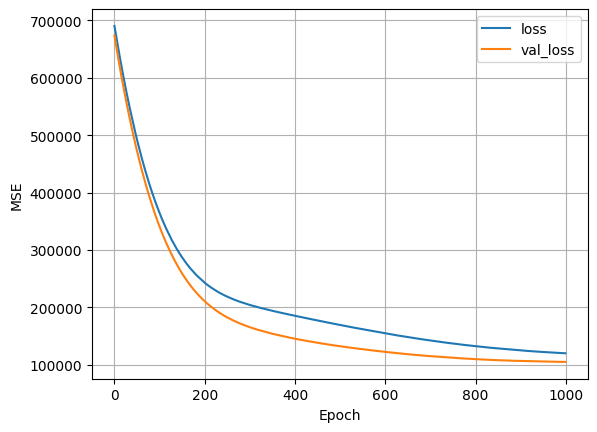

In [ ]:
plot_loss(history)

Neural Net

In [ ]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

# Define the neural network model
nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32 ,activation='relu'),
    tf.keras.layers.Dense(32 ,activation='relu'),
    tf.keras.layers.Dense(32 ,activation='relu'),
    tf.keras.layers.Dense(1 )
])

# Compile the model
nn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error'
)

# Train the model
history = nn_model.fit(
    X_train_temp, y_train_temp,
    epochs=100,
    verbose=0,
    validation_data=(X_valid_temp, y_valid_temp)
)

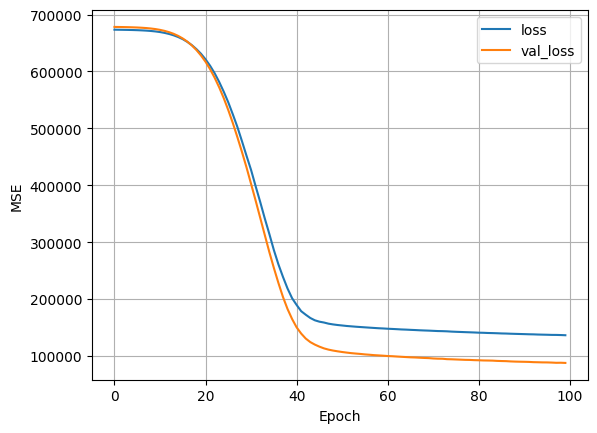

In [ ]:
plot_loss(history)

4/4 [==============================] - 0s 2ms/step


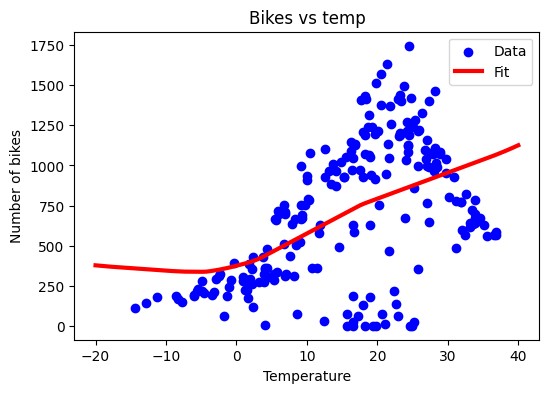

In [ ]:
plt.figure(figsize=(6, 4))
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temperature")
plt.show()

In [ ]:
all2_normalizer = tf.keras.layers.Normalization(input_shape=[6,], axis=-1)
all2_normalizer.adapt(x_train)

In [ ]:
nn_model = tf.keras.Sequential([
    all2_normalizer,
    tf.keras.layers.Dense(32 ,activation='relu'),
    tf.keras.layers.Dense(32 ,activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    loss='mean_squared_error'
)

In [ ]:
history = nn_model.fit(
    x_train, y_train,
    epochs=100,
    verbose=0,
    validation_data=(x_valid, y_valid)
)

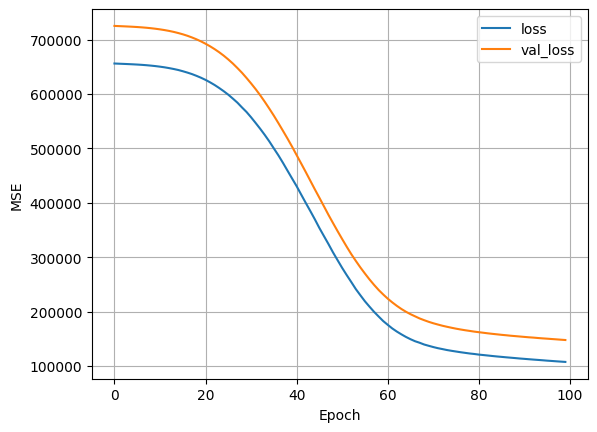

In [ ]:
plot_loss(history)

In [ ]:
#Calculate the mean-squared-error for both the linear regressor and neural net
y_pred_lr = all_reg.predict(x_test)
y_pred_nn = nn_model.predict(x_test)

3/3 [==============================] - 0s 3ms/step


In [ ]:
def mse(y_true, y_pred):
    return (np.square(y_true - y_pred)).mean()

In [ ]:
def MSE(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [ ]:
mse(y_test, y_pred_lr)

110061.8856185799

In [ ]:
MSE(y_test, y_pred_lr)

110061.8856185799

In [ ]:
mse(y_test, y_pred_nn)

123729.51703115267

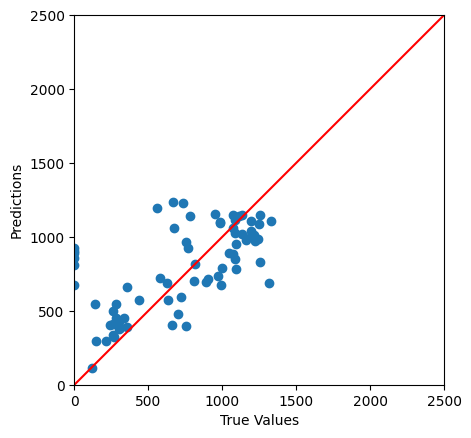

In [ ]:
ax = plt.axes(aspect='equal') #(projection='3d')
plt.scatter(y_test, y_pred_lr)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 2500]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims, c="red")

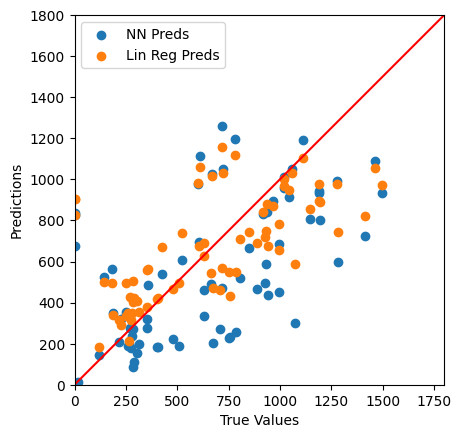

In [ ]:
ax = plt.axes(aspect='equal') #(projection='3d')
plt.scatter(y_test, y_pred_nn, label="NN Preds")
plt.scatter(y_test, y_pred_lr, label="Lin Reg Preds")
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1800]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="red")